<a href="https://colab.research.google.com/github/DanyaFire/StatPrac/blob/main/DZ_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

## Serial test

Idea: break the sequence $x_1, x_2, x_3, ..., x_{2n}$ into consecutive series of length $2$: $(x_1, x_2), (x_3, x_4), ..., (x_{2n-1}, x_{2n})$ and look at each element as a random and independent point in $2D$ space. Next, apply chi-square. Similarly, one can construct series of length $3, 4$, etc.

### Problem 1
Implement serial test and apply to a `samples`

In [6]:
import numpy as np
from scipy import stats

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

samples = [rng() for _ in range(10000)]

pared_samples = list(zip(samples[0::2], samples[1::2]))
# print(pared_samples)

k = 20
f_obs = np.histogram(pared_samples, np.linspace(0, 1, k+1))[0] # histogram возвращает 2 аргумента: лист частот и лист точек разбиения отрезка [0;1], нам нужен только 1-ый аргумент
f_exp = np.full(k, len(samples) // k) # Ожидаемые частоты

# print(f_exp, f_obs)
print(stats.chisquare(f_exp, f_obs))
if stats.chisquare(f_exp, f_obs)[1] > 0.05:
  print("Conclusion - the observed value of the statistic does not contradict the hypothesis of chi-square distribution.")
else:
  print("Conclusion - the observed value of the statistic does contradict the hypothesis of chi-square distribution.")

Power_divergenceResult(statistic=12.898260152349645, pvalue=0.843738370589677)
Conclusion - the observed value of the statistic does not contradict the hypothesis of chi-square distribution.


### Problem 2

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [7]:
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

samples_bad = [rng_bad() for _ in range(30000)]
samples_good = [rng() for _ in range(30000)]

k = 20
f_obs, g_obs = np.histogram(samples_bad, np.linspace(0, 1, k+1))[0], np.histogram(samples_good, np.linspace(0, 1, k+1))[0]
f_exp, g_exp = np.full(k, len(samples_bad) // k), np.full(k, len(samples_good) // k)

print(f'Chisquare of rng_bad: {stats.chisquare(f_exp, f_obs)}')
print(f'Chisquare of rng_good: {stats.chisquare(g_exp, g_obs)}\n')

print("Conclusion of rng_bad:")
if stats.chisquare(f_exp, f_obs)[1] > 0.05:
  print("Conclusion - the observed value of the statistic does not contradict the hypothesis of chi-square distribution.\n")
else:
  print("Conclusion - the observed value of the statistic does contradict the hypothesis of chi-square distribution.\n")

print("Conclusion of rng_good:")
if stats.chisquare(g_exp, g_obs)[1] > 0.05:
  print("Conclusion - the observed value of the statistic does not contradict the hypothesis of chi-square distribution.")
else:
  print("Conclusion - the observed value of the statistic does contradict the hypothesis of chi-square distribution.")

Chisquare of rng_bad: Power_divergenceResult(statistic=30.91269296584691, pvalue=0.041272214096983034)
Chisquare of rng_good: Power_divergenceResult(statistic=23.348392061943404, pvalue=0.22234490004820046)

Conclusion of rng_bad:
Conclusion - the observed value of the statistic does contradict the hypothesis of chi-square distribution.

Conclusion of rng_good:
Conclusion - the observed value of the statistic does not contradict the hypothesis of chi-square distribution.


### Problem 3
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

Weights:[0.13883115 0.08214018 0.07379997 0.10478602 0.2089023  0.07563102
 0.00324049 0.20909846 0.0330847  0.07048571] 
Sum of weights: 1


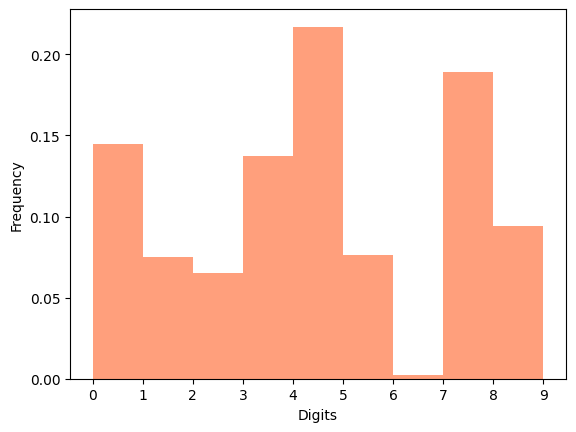

In [8]:
import matplotlib.pyplot as plt

data = np.array([rng() for _ in range(10)])
# print(data)
weights = data / sum(data) # Дабы сумма всех весов была равной единице, так как в примере это не выполнено
print(f'Weights:{weights} \nSum of weights: {round(sum(weights))}')
digits = np.arange(10)
sort_indexes = np.argsort(weights) # Выдаёт индексы отсортированного по возрастанию массива
# print(sort_indexes)

sample = np.random.choice(digits[sort_indexes], size = 1000, replace = True, p = weights[sort_indexes])
# print(sample)
plt.hist(sample, bins = np.arange(0, 10, 1), alpha = 0.75, color = 'coral', density = True)

plt.ylabel("Frequency")
plt.xlabel("Digits")
plt.xticks(digits)
plt.show()

### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

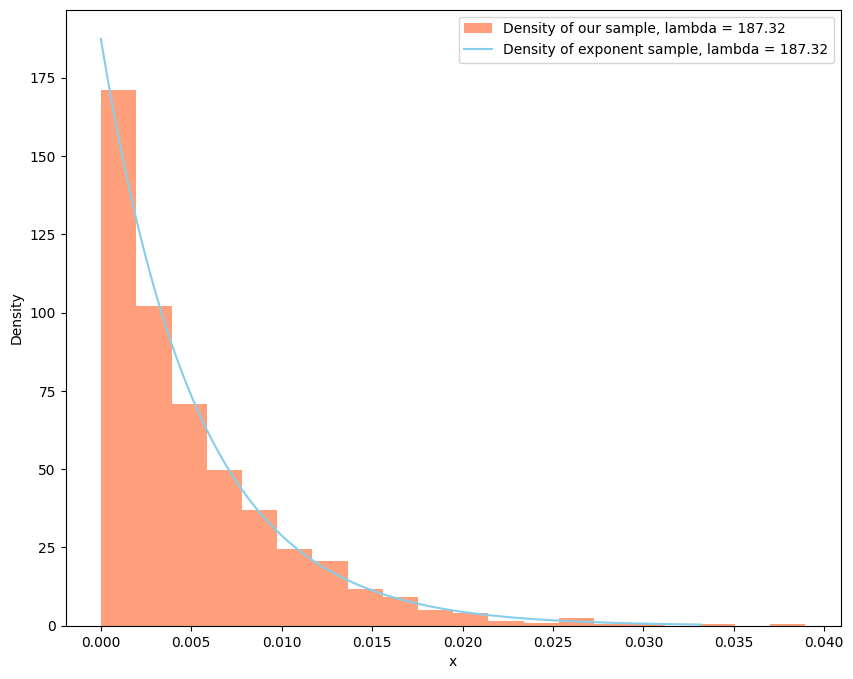

In [9]:
sample = np.array([rng() for _ in range(1000)])
r = np.random.uniform(1,1000)
exponential_sample = -1/r*(np.log(1 - sample))
# print(exponential_sample)
x_max = np.quantile(exponential_sample, 0.999) # Квантиль уровня 0,999. Это чисто для масштаба и работы с большими r, иначе график неприятный.

plt.figure(figsize = (10, 8))
plt.hist(exponential_sample, bins = 20, color = 'coral', alpha = 0.75, density = True, label = f'Density of our sample, lambda = {round(r,2)}')
x = np.linspace(0, x_max, 100)
plt.plot(x, r*np.exp(-r*x), color = 'skyblue', linestyle = '-', label = f'Density of exponent sample, lambda = {round(r,2)}')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

1


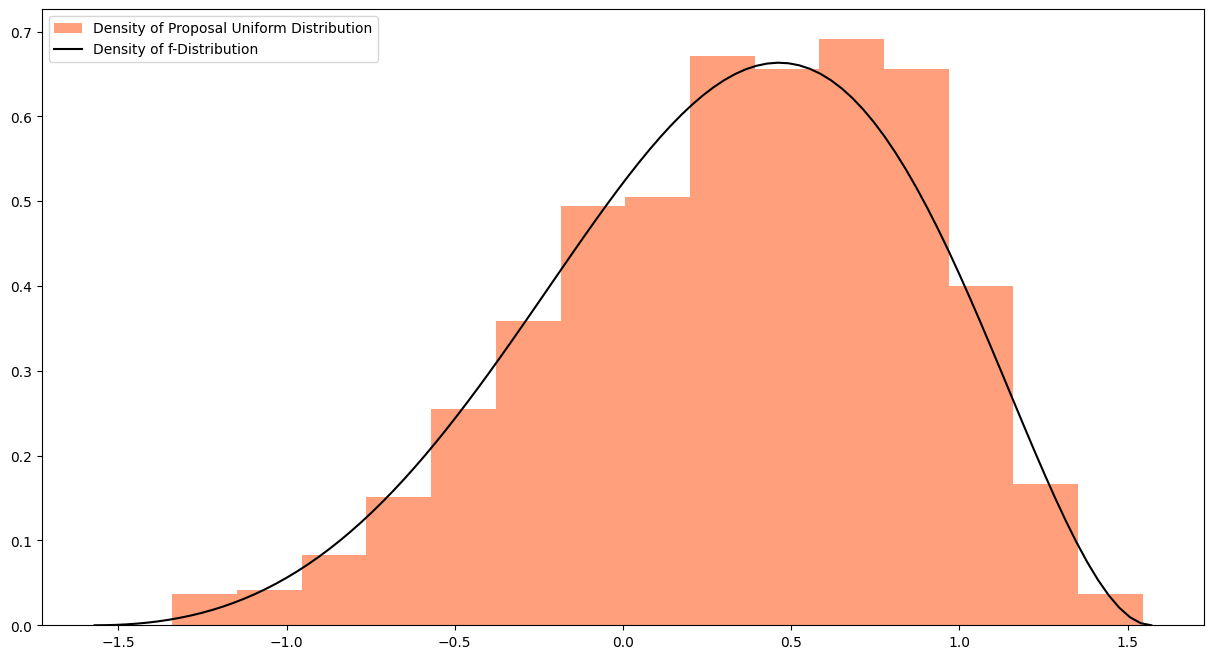

In [28]:
import scipy.integrate

def f(x):
  return (np.exp(x)*(np.cos(x))**2)/((5/12) * (np.exp(np.pi/2) - np.exp(-np.pi/2)))

print(round(scipy.integrate.quad(f,-np.pi/2, np.pi/2)[0])) # Проверка свойства функции плотности

def rng(m = 2 ** 32, a = 1103515245, c = 12345, seed = 1):
    rng.current = seed
    while True:
        rng.current = (a * rng.current + c) % m
        yield rng.current / m

sample = []
random_gen = rng()
count = 0
while count < 1000:
    current = (-1 / 2 + next(random_gen)) * np.pi  # Сдвиг [0,1] -> [-π/2, π/2]
    if np.random.uniform(0, 10 / np.pi) <= f(current): # Проверка, т.е. принятие или отвержение. Если случайное число из равн. распр. на [0, \frac{10}{\pi} < f(current)], то current принимаем и записываем в выборку
        sample.append(current)
        count += 1

plt.figure(figsize = (15, 8))
x = np.linspace(-np.pi / 2, np.pi / 2, 100)
plt.hist(sample, bins = 15, alpha = 0.75, color = 'coral', density = True, label = "Density of Proposal Uniform Distribution")
plt.plot(x, f(x), "k-", label = "Density of f-Distribution")
plt.legend(loc = "upper left")
plt.show()

### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

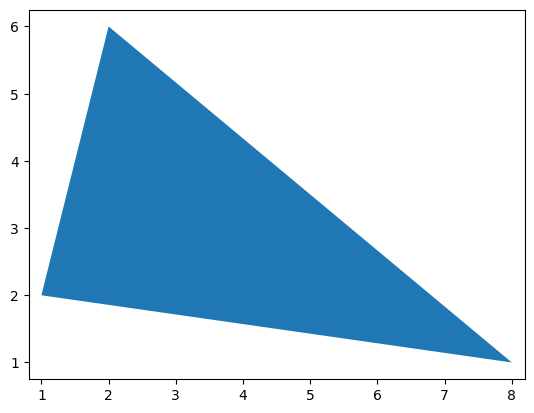

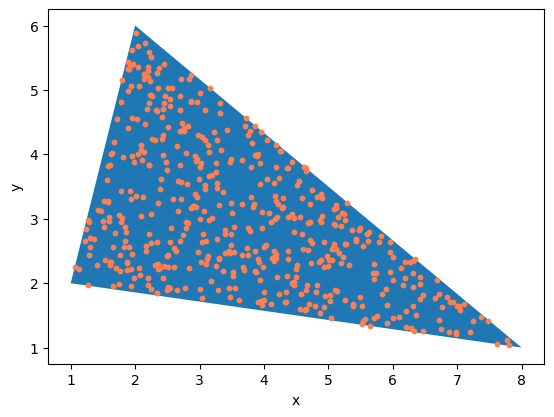

In [62]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

n = 500
A = [1,2]
B = [2,6]
C = [8,1]

vertices = np.array([A, B, C])

fig = plt.figure()
polygon = Polygon(vertices, closed = True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

# Генерируем 500 точек внутри треугольника
def points_in_triangle(vertices, n):
    points = []
    for _ in range(n):
        u, v = np.random.rand(2) # Генерация рандомного числа из промежутка [0;1)]
        if u + v > 1:
            u, v = 1 - u, 1 - v
        point = (1 - u - v) * vertices[0] + u * vertices[1] + v * vertices[2] # Получаем точки внутри треугольника из выборки
        points.append(point)
    return np.array(points)

points = points_in_triangle(vertices, n)

fig, ax = plt.subplots()
polygon = Polygon(vertices, closed = True)
ax.add_patch(polygon)
ax.scatter(points[:,0], points[:,1], color = 'coral', s = 10)
ax.set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

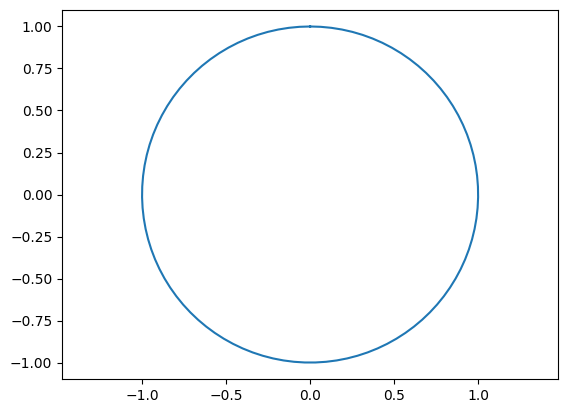

In [69]:
fig = plt.figure()

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

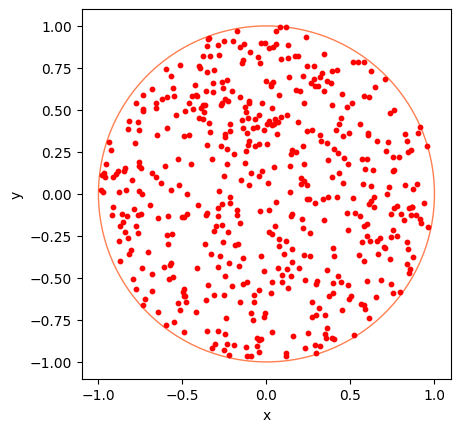

In [71]:
def points_inside_circle(n):
  r = np.sqrt((np.random.uniform(0,1,n)))
  varphi = np.random.uniform(0,2*np.pi,n)
  x = r * np.cos(varphi)
  y = r * np.sin(varphi)
  return x, y

x, y = points_inside_circle(n)

fig, ax = plt.subplots()
circle = plt.Circle((0, 0), 1, edgecolor='coral', facecolor='none')
ax.add_patch(circle)
ax.scatter(x, y, s=10, color='red')
ax.set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

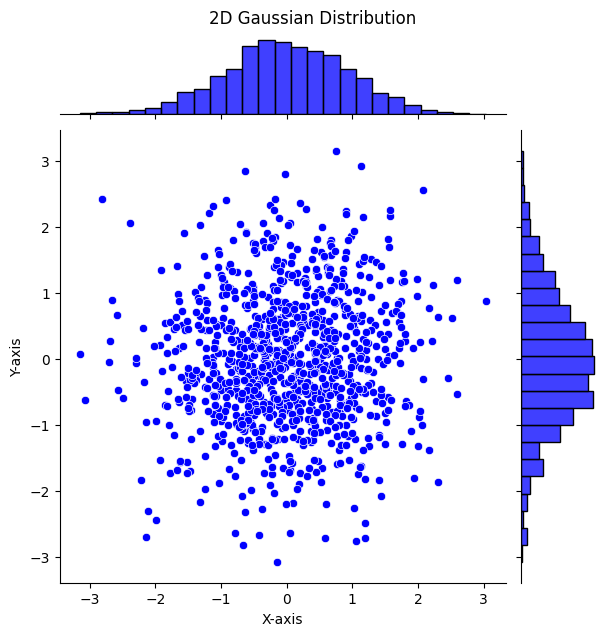

In [73]:
import seaborn as sns
import scipy.linalg

n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)


joint_plot = sns.jointplot(x=x, y=y, color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

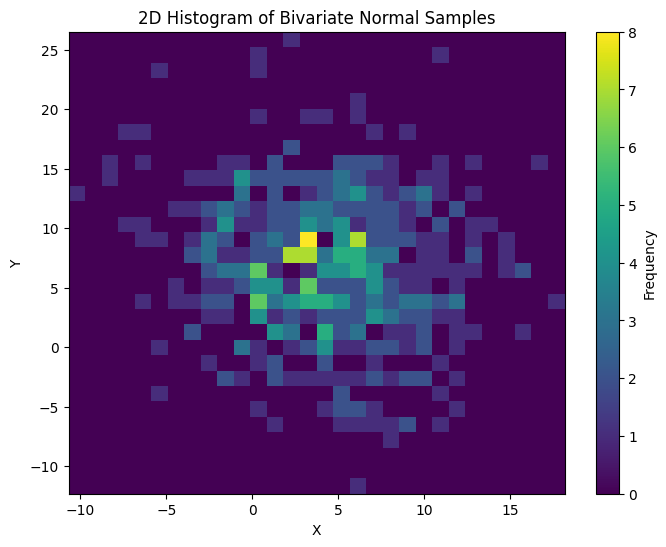

Sample Mean: [4.26634972 6.76319521]
Sample Covariance:
 [[21.09810423 -3.35456628]
 [-3.35456628 33.3196982 ]]
Exact Mean:
 [4 7]
Exact Covariance:
 [[20 -4]
 [-4 40]]


In [83]:
def box_muller():
    while True:
        v1 = 2 * np.random.uniform(-1,1)
        v2 = 2 * np.random.uniform(-1,1)
        s = v1**2 + v2**2
        if 0 < s < 1:
            w = np.sqrt((-2 * np.log(s)) / s)
            return v1 * w, v2 * w

def generate_multivariate_normal(mean, covariance, num_samples):
    num_pairs = num_samples // 2
    z_samples = np.array([box_muller() for _ in range(num_pairs)])

    # Если вдруг число пар нечетно
    if num_samples % 2 != 0:
        z_samples = np.vstack([z_samples, box_muller()])  # Объединяем массивы, присоединением, как башня на башню

    # Разложение Холецкого матрицы ковариаций
    L = np.linalg.cholesky(covariance)

    #Генерация коррелированных величин
    X = mean.T + z_samples @ L.T #Матричное произведение + сдвиг

    return X

mean = np.array([[4], [7]])
covariance = np.array([[20, -4], [-4, 40]])
num_samples = 1000

samples = generate_multivariate_normal(mean, covariance, num_samples)

# 2D-гистограмма
plt.figure(figsize=(8, 6))
plt.hist2d(samples[:, 0], samples[:, 1], bins=30, cmap='viridis')
plt.colorbar(label='Frequency')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Histogram of Bivariate Normal Samples')
plt.show()

#Среднее значение и ковариация величин
sample_mean = np.mean(samples, axis=0)
sample_covariance = np.cov(samples.T)

print("Sample Mean:", sample_mean)
print("Sample Covariance:\n", sample_covariance)
print("Exact Mean:\n", mean.flatten()) # Сделали строчный лист
print("Exact Covariance:\n", covariance)